# Avances de tesis

Este notebook esta pensado exclusivamente para presentar los avances más relevantes del trabajo de tesis de Licenciatura en Física. El tema esta enfocado a física estadística y dinámica no lineal en el tema de **transiciones de fase en poblaciones en coexistencia**. Los elementos fundamentales del trabajo es construir un modelo de competencia de especies (Lotka-Volterra) para observar la dinámica poblacional, los parámetros de este sistema no-lineal estarán dados en función de matrices aleatorias; con ello el nos apoyaremos del trabajo de Robert May enfocado a la estabilidad de sistemas no-lineales de dimensión $N$, así como revisar la ley circular que es la continuación del trabajo de May realizado por Steffano Allesiana.

Una vez revisado el modelo y su estabilidad nos enfocaremos en analizar el tipo de transiciones de fase que ocurren en las interacciones entre poblaciones, para ello se tienen dos artículos referentes al tema (poner autores). Con base en estas ideas se propondrá un modelo original enfocado en el cáncer que evoluciona a metástasis, la pregunta a responder es ver si esta evolución corresponde a una transición de fase. Para meternos en el tema del cáncer y del sistema inmune es necesario revisar las células y agentes involucrados en la dinámica.

Dicho lo anterior, esta es una breve estructura del trabajo.

## Revisión breve de sistemas lineales

En pocas palabras se trata de sistemas de ecuaciones diferenciales de primer orden y lineales, son que presentan comportamientos interesantes si les resolvemos y observamos sus espacios fase, cuentan con atractores, repulsores y puntos silla de distintas naturaleza. La característica principal de estos sistemas es que se pueden resolver de forma analítica determinando los eigenvalores y sus respectivos eigenvectores. Inclusive los propios eigenvalores ya nos brindan información del tipo de punto fijo con el que estamos tratando. Esto debido a que cumplen el princiio de superposición, la suma de las soluciones del sistema también es solución y con ella se puede generar un espacio vectorial capaz de arrojarnos una infinidad de soluciones. Estos sistemas son muy interesantes de estudiar y pedagógicamente aportan mucho al entendimiento de los sistemas dinámicos continuos sin embargo en la naturaleza no se presentan muchos casos en donde puedan estar descritos por sistemas lineales, la naturaleza es compleja y por lo regular los fenómenos no son iguales a la suma de sus partes.

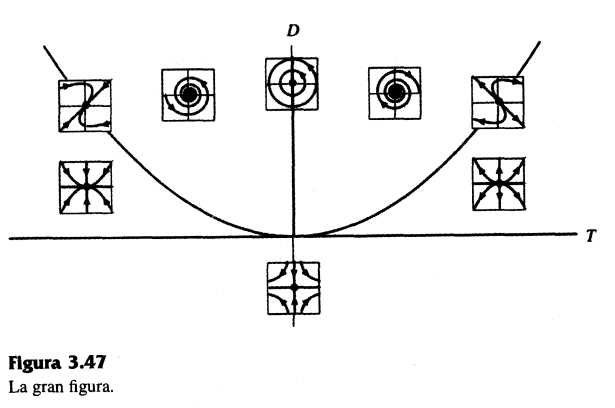

## Sistemas no-lineales

Aquí es donde aparecen los sistemas no-lineales, que describen comportamientos complejos y no son resolubles de manera analítica. En general este tipo de sistemas describe comportamientos caóticos que en otras palabras son comportamientos que dependen de las condiciones anteriores en el tiempo, es por ello que se dice que son sensibles ante condiciones iniciales. Para poder resolver este tipo de sistemas es necesario aplicar técnicas matemáticas que nos lleven a comprender el fenómeno como un sistema lineal cerca de los puntos críticos. A este proceso se la llama **linearización** y consiste en determinar los puntos críticos del sistema y aplicar el Jacobiano a la matriz de interacciones (es decir, derivar cada entrada de la matriz de interacciones). Con ello podemos analizar el comportamiento alrededor de los puntos críticos de forma analítica.

Sin embargo, tenemos otra alternativa para conocer las series de tiempo y los espacios fase del sistema: se trata de resolver el sistema de forma computacional, mediante algorítmos que ocupen derivación discreta o lo que es lo mismo diferencias finitas. En este trabajo se hace uso del método de Runge-Kutta a orden 4 ya que nos brinda mejores aproximaciones que el método de Euler entre otros.

A continuación se presentan los resultados de un sistema de 5 y 10 especies en comptencia. Nota: únicamente se presentarán los resultados para que el notebook no se vea atascado de información, para consultar el código y las pruebas ir a revisar los archivos de main.jl y Pruebas.ipynb.

El sistema a tratar es el siguiente:

$$
\frac{dx_i}{dt}=r_ix_i\left(1-\frac{\sum_{j=1}^N \alpha_{ij}x_j}{K_i}\right)
$$

Donde las $x_i(t)$ son las poblaciones de cada una de las especies involucradas. Las $r_i$ son las tasas de crecimiento mientras que las $K_i$ son las capacidades de carga, las $\alpha_{ij}$ son las entradas de la matriz de interacciones, que para este caso vamos a tomarlos como números aleatorios de una distribución normal.

In [3]:
include("main.jl")

redAleatoria (generic function with 1 method)

5×5 SparseArrays.SparseMatrixCSC{Float64, Int64} with 9 stored entries:
  0.787656   ⋅        0.956437    ⋅          ⋅ 
   ⋅        0.181492   ⋅          ⋅          ⋅ 
 -1.31265    ⋅        0.621923    ⋅          ⋅ 
   ⋅         ⋅         ⋅         1.01474   -0.873535
   ⋅         ⋅         ⋅        -0.740806   0.920395

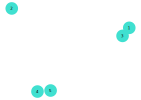

In [4]:
#Red aleatoria
M,g = randomMatrix(5,0.25)
display(M)
gplot(g,nodelabel = 1:5)

10×10 SparseArrays.SparseMatrixCSC{Float64, Int64} with 12 stored entries:
 2.20403   ⋅         ⋅       ⋅        …   ⋅          ⋅        ⋅ 
  ⋅       0.838924   ⋅       ⋅            ⋅          ⋅        ⋅ 
  ⋅        ⋅        1.2174   ⋅            ⋅          ⋅        ⋅ 
  ⋅        ⋅         ⋅      0.312065      ⋅          ⋅        ⋅ 
  ⋅        ⋅         ⋅       ⋅            ⋅          ⋅        ⋅ 
  ⋅        ⋅         ⋅      0.66511   …   ⋅          ⋅        ⋅ 
  ⋅        ⋅         ⋅       ⋅            ⋅          ⋅        ⋅ 
  ⋅        ⋅         ⋅       ⋅           0.0918815   ⋅        ⋅ 
  ⋅        ⋅         ⋅       ⋅            ⋅         1.63455   ⋅ 
  ⋅        ⋅         ⋅       ⋅            ⋅          ⋅       0.702125

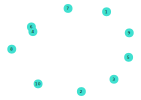

In [16]:
A, G = randomMatrix(10,0.05)
display(A)
gplot(G,nodelabel = 1:10)

In [17]:
x0 = [rand(), rand(), rand(), rand(), rand()]
x1 = [rand(), rand(), rand(), rand(), rand(),rand(), rand(), rand(), rand(), rand()]
t0 = 0
tf = 20
dt = 0.1

t, sol5 = cincoEspecies(x0,t0,tf,dt,M)
t, sol10 = diezEspecies(x1,t0,tf,dt,A)

(0.0:0.1:20.0, [0.7200560558405306 0.2304047341757809 … 0.16810814802123042 0.2837859575235987; 0.7480555644018357 0.27745857926161843 … 0.19926615855343846 0.3391360193345044; … ; 0.9074291002680065 3.5760087618621594 … 1.223577040852082 2.84849486117193; 0.9074291002680065 3.5760087618621594 … 1.223577040852082 2.84849486117193])

In [18]:
plot(t,sol5[:,1],label ="Especie 1",w=2,
    title = "5 Especies en competencia",
    xlabel = "Tiempo",
    ylabel = "N_(t)"
)
plot!(t,sol5[:,2],label ="Especie 2",w=2)
plot!(t,sol5[:,3],label ="Especie 3",w=2)
plot!(t,sol5[:,4],label ="Especie 4",w=2)
plot!(t,sol5[:,5],label ="Especie 5",w=2)

In [19]:
plot(t,sol10[:,1],label ="",w=2,
    title = "10 Especies en competencia",
    xlabel = "Tiempo",
    ylabel = "N_(t)"
)
plot!(t,sol10[:,2],label ="",w=2)
plot!(t,sol10[:,3],label ="",w=2)
plot!(t,sol10[:,4],label ="",w=2)
plot!(t,sol10[:,5],label ="",w=2)
plot!(t,sol10[:,6],label ="",w=2)
plot!(t,sol10[:,7],label ="",w=2)
plot!(t,sol10[:,8],label ="",w=2)
plot!(t,sol10[:,9],label ="",w=2)
plot!(t,sol10[:,10],label ="",w=2)